<a href="https://colab.research.google.com/github/ashishbhatta/Pumped-Storage-Hydro/blob/main/Gamma_for_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data downloded from IEX website (https://www.iexindia.com/market-data/day-ahead-market/market-snapshot) is stored in github. The download link for all these files are extracted.

In [16]:
import requests

# GitHub API endpoint for your folder
api_url = "https://api.github.com/repos/ashishbhatta/Energy_Arbitrage/contents/IEX%20Data"

r = requests.get(api_url)
r.raise_for_status()
files = r.json()

raw_links = []

for file in files:
    if file["name"].endswith(".xlsx"):   # only Excel files
        raw_links.append(file["download_url"])

print("Raw Excel file links:")
for l in raw_links:
    print(l)

Raw Excel file links:
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%

In [17]:
import pandas as pd

Import Excel files from the github and merge them to a single Data Frame final_df

In [18]:
import requests
import pandas as pd

# GitHub API endpoint for your folder
api_url = "https://api.github.com/repos/ashishbhatta/Energy_Arbitrage/contents/IEX%20Data"

# Get folder contents
r = requests.get(api_url)
r.raise_for_status()
files = r.json()

# Collect Excel file download links
raw_links = [file["download_url"] for file in files if file["name"].endswith(".xlsx")]

all_dfs = []  # list to collect cleaned DataFrames

for link in raw_links:
    try:
        # Read Excel with same skiprows, header, index settings
        df = pd.read_excel(link, skiprows=4, header=0, index_col=0)

        # Drop rows where 7th or 8th column is NaN
        df_cleaned = df.dropna(subset=[df.columns[6], df.columns[7]])

        # Add a column with file name (so you know the source)
        df_cleaned["Source_File"] = link.split("/")[-1]

        # Append to list
        all_dfs.append(df_cleaned)

        print(f"✅ Processed: {link.split('/')[-1]}, shape = {df_cleaned.shape}")

    except Exception as e:
        print(f"❌ Failed for {link}: {e}")

# Combine all into one DataFrame
final_df = pd.concat(all_dfs, ignore_index=False)

print("\n📊 Final DataFrame shape:", final_df.shape)

/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: April%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: April%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: April%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: April%202025.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: August%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: August%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: August%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: August%202025.xlsx, shape = (2494, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: December%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: December%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: December%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: February%202023.xlsx, shape = (2688, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: February%202024.xlsx, shape = (2784, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: Feburay%202025.xlsx, shape = (2688, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: January%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: January%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: January%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: July%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: July%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: July%202024.xlsx, shape = (2974, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: July%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: June%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: June%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: June%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: June%202025.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: March%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: March%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: March%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: May%202022.xlsx, shape = (2230, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: May%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: May%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: May%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: November%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: November%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: November%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: October%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: October%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: October%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: September%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Processed: September%202023.xlsx, shape = (2880, 9)
✅ Processed: September%202024.xlsx, shape = (2880, 9)

📊 Final DataFrame shape: (118674, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a proper datatime by extracting the hours data and combining it with the date

In [19]:
final_df["Start_Time"] = final_df["Time Block"].str.split("-").str[0]

# Make proper datetime
final_df["DateTime"] = pd.to_datetime(final_df.index.astype(str) + " " + final_df["Start_Time"], format="%d-%m-%Y %H:%M")

Set DateTime as an index and sort it in accending order

In [20]:
final_df = final_df.set_index("DateTime")
final_df = final_df.sort_index()
final_df

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *,Source_File,Start_Time
DateTime,,,,,,,,,,
2022-04-01 00:00:00,1,1,00:00-00:15,6912.20,2796.90,1892.90,1892.90,16744.25,April%202022.xlsx,00:00
2022-04-01 00:15:00,1,1,00:15-00:30,6741.60,2870.40,1966.40,1966.40,16000.58,April%202022.xlsx,00:15
2022-04-01 00:30:00,1,2,00:30-00:45,6849.20,2663.60,2099.60,2099.60,16689.62,April%202022.xlsx,00:30
2022-04-01 00:45:00,1,2,00:45-01:00,6558.30,2718.50,2104.50,2104.50,16000.12,April%202022.xlsx,00:45
2022-04-01 01:00:00,2,3,01:00-01:15,6295.20,2517.90,2157.47,2157.47,14998.50,April%202022.xlsx,01:00
...,...,...,...,...,...,...,...,...,...,...
2025-08-26 22:15:00,23,45,22:15-22:30,9826.10,9104.50,8088.50,8088.50,4070.00,August%202025.xlsx,22:15
2025-08-26 22:30:00,23,46,22:30-22:45,9908.30,8378.40,7484.40,7484.40,4510.91,August%202025.xlsx,22:30
2025-08-26 22:45:00,23,46,22:45-23:00,10335.30,8507.80,7773.39,7773.39,4850.49,August%202025.xlsx,22:45


Create a Datetime plot

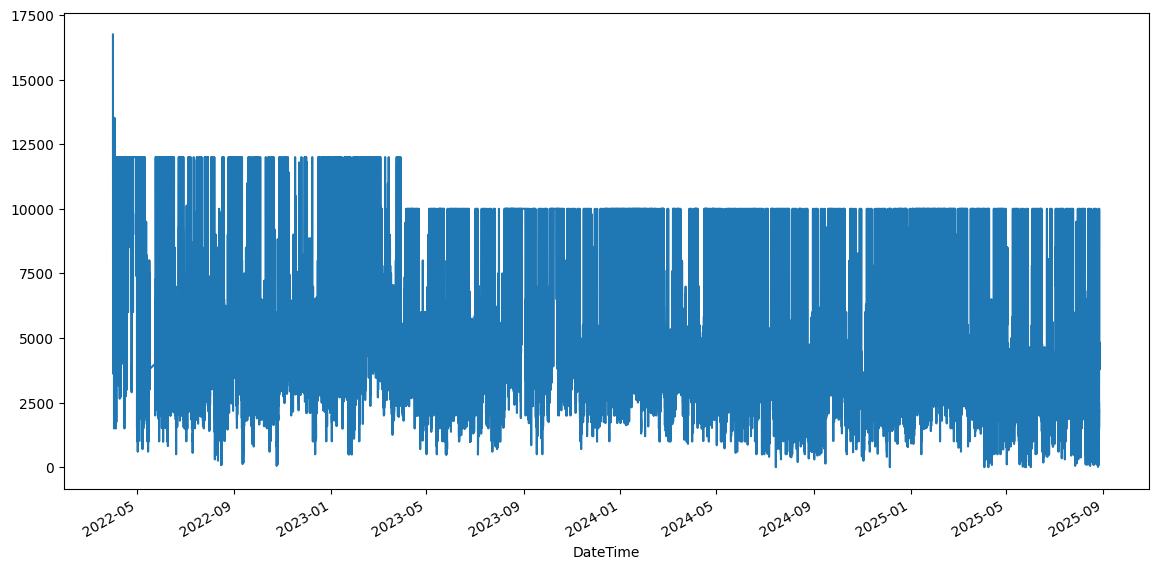

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))  # Bigger figure
final_df["MCP (Rs/MWh) *"].plot(kind="line")
plt.show()

Export the whole data into csv file.

In [22]:
final_df.to_csv("final_df.csv")

Use ploty to make interactive plots

In [23]:
import plotly.express as px

fig = px.line(
    final_df.reset_index(),
    x="DateTime",
    y="MCP (Rs/MWh) *",
    title="Market Clearing Price (15-min intervals)",
    labels={"MCP (Rs/MWh) *": "MCP (Rs/MWh)", "DateTime": "Time"},
    markers=True
)

fig.show()

Export the interactive plots to html file.

In [24]:
fig.write_html("MCP_plot.html")

print("Interactive plot saved as MCP_plot.html")

Interactive plot saved as MCP_plot.html


Plot the price load sensitivity plot for the month of May and neglecting the price cap (>= Rs 10000 /MWh)

In [25]:
final_df = final_df.sort_values(by="Purchase Bid (MW)", ascending=True)
month_df = final_df.loc["2023-05"]
month_df = month_df[month_df["MCP (Rs/MWh) *"] < 10000]
fig = px.scatter(
    month_df,
    x="Purchase Bid (MW)",
    y="MCP (Rs/MWh) *",
    title="Market Clearing Price (15-min intervals)",
    labels={
        "MCP (Rs/MWh) *": "MCP (Rs/MWh)",
        "Purchase Bid (MW)": "Purchase Bid (MW)"
    })
fig.show()
month_df.to_csv("month_df.csv")

In [26]:
# Convert to numeric, force errors to NaN (then drop them)
month_df["Purchase Bid (MW)"] = pd.to_numeric(month_df["Purchase Bid (MW)"], errors="coerce")
month_df["MCP (Rs/MWh) *"] = pd.to_numeric(month_df["MCP (Rs/MWh) *"], errors="coerce")

# Drop rows with NaNs after conversion
month_df = month_df.dropna(subset=["Purchase Bid (MW)", "MCP (Rs/MWh) *"])


Determinin the slope of line ( the slope calcualted from excel is used for analysis not this one). this section need further correction

In [27]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Prepare data
x = month_df["Purchase Bid (MW)"].values.reshape(-1, 1)
y = month_df["MCP (Rs/MWh) *"].values

# Fit ONE linear regression
model = LinearRegression().fit(x, y)

# Prediction line
x_line = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot scatter + regression line
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=month_df["Purchase Bid (MW)"],
    y=month_df["MCP (Rs/MWh) *"],
    mode="markers",
    name="Data"
))

fig.add_trace(go.Scatter(
    x=x_line.flatten(),
    y=y_line,
    mode="lines",
    name="Linear Regression",
    line=dict(width=3)
))

fig.update_layout(
    title="Single Linear Regression Line",
    xaxis_title="Purchase Bid (MW)",
    yaxis_title="MCP (Rs/MWh)"
)

fig.show()
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)


Slope (m): 1.0349090432165031
Intercept (b): -628.2405376067181
